Making dataset for Door_EXP

### Save CSI as npy

In [ ]:
import save_npy

for folder in ('A208', 'B211', 'A308', 'A308T', 'C605'):
    datapath = f"../dataset/Door_EXP/{folder}/"
    save_npy.save_npy(datapath, datapath)

### Preprocess CSI

In [2]:
import make_dataset_v07 as md
import os

# for folder in ('A208', 'B211', 'A308', 'A308T', 'C605'):
    # csi_path = f"../dataset/Door_EXP/{folder}/"
csi_path = f"../dataset/Door_EXP/A208/"
paths = os.walk(csi_path)
for path, _, file_lst in paths:
    for file_name in file_lst:
        file_name_, ext = os.path.splitext(file_name)
        if ext == '.npy' and 'csio' in file_name_:
            csiloader = md.CSILoader(os.path.join(path, file_name))
            csiloader.preprocess()
            csiloader.save()

0709A01-csio.npy npy load start... Wed Sep  4 13:13:08 2024
loaded
scaled
Removing sm...Done
0709A01-csio.npy (194809, 30, 3, 3) load complete Wed Sep  4 13:13:56 2024
0709A01-csio.npy apply dynamic component extraction: overall-divide versus tx1...Done
0709A01-csio.npy apply dynamic component extraction: highpass versus rx0...Done
0709A13-csio.npy npy load start... Wed Sep  4 13:14:20 2024
loaded
scaled
Removing sm...Done
0709A13-csio.npy (163244, 30, 3, 3) load complete Wed Sep  4 13:14:59 2024
0709A13-csio.npy apply dynamic component extraction: overall-divide versus tx1...Done
0709A13-csio.npy apply dynamic component extraction: highpass versus rx0...Done
0709A21-csio.npy npy load start... Wed Sep  4 13:15:19 2024
loaded
scaled
Removing sm...Done
0709A21-csio.npy (179443, 30, 3, 3) load complete Wed Sep  4 13:16:03 2024
0709A21-csio.npy apply dynamic component extraction: overall-divide versus tx1...Done
0709A21-csio.npy apply dynamic component extraction: highpass versus rx0...Don

In [ ]:
import numpy as np
t = np.load('../dataset/Door_EXP/A208/0709A00-csitime.npy')
print(t[-1], t[0])
c = np.load('../dataset/Door_EXP/A208/20240709_142959-env-camtime.npy')
print(c[-1], c[0])
print(len(c))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
csi = np.load('../dataset/Door_EXP/A208/0709A00-csi.npy', mmap_mode='r')
print(csi.shape)
csi_mag = np.abs(csi)
csi_phase = np.unwrap(np.angle(csi))

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(csi_mag[:, 1, :, 0])
plt.subplot(2, 1, 2)
plt.plot(csi_phase[:, 0, :, 0])
plt.show()

In [5]:
import make_dataset_v07 as md
csiloader = md.CSILoader('../dataset/Door_EXP/A208/0709A211-csio.npy')
csiloader.preprocess()
csiloader.save()

0709A211-csio.npy npy load start... Tue Sep  3 11:05:40 2024
loaded
scaled
Removing sm...Done
0709A211-csio.npy (105362, 30, 3, 3) load complete Tue Sep  3 11:06:05 2024
0709A211-csio.npy apply dynamic component extraction: overall-divide versus tx1...Done
0709A211-csio.npy apply dynamic component extraction: highpass versus rx0...Done


In [ ]:
import numpy as np
c1 = np.load('../dataset/Door_EXP/A208/0709A211-csik.npy', mmap_mode='r')
c2 = np.load('../dataset/Door_EXP/A208/0709A211-csi.npy', mmap_mode='r')
print(np.all(c1==c2))

### Calculate Phase Difference

In [1]:
import make_dataset_v07 as md
for folder in ('A208', 'B211', 'A308', 'A308T', 'C605'):
    csi_path = f"../dataset/Door_EXP/{folder}/"
    phasediffmaker = md.FilterCSIPD(csi_path)
    phasediffmaker.load()
    phasediffmaker.preprocess()

Loading ../dataset/Door_EXP/A208/...

Loaded labels_jiao.csv of len 164
Loaded labels_zhang.csv of len 170
Loaded labels_wang.csv of len 162
Loaded labels_higashinaka.csv of len 168
Loaded labels_qiao.csv of len 160
Loaded labels_chen.csv of len 160


In-subject:   0%|          | 0/6 [00:00<?, ?it/s]

CSI for subject jiao: 0709A54: (71925, 30, 3)
CSI for subject jiao: 0709A52: (167964, 30, 3)
CSI for subject jiao: 0709A541: (71833, 30, 3)
CSI for subject jiao: 0709A531: (100869, 30, 3)
CSI for subject jiao: 0709A50: (133412, 30, 3)
CSI for subject jiao: 0709A53: (56999, 30, 3)
CSI for subject jiao: 0709A513: (94466, 30, 3)
CSI for subject jiao: 0709A511: (62914, 30, 3)
CSI for subject jiao: 0709A51: (27427, 30, 3)
CSI for subject jiao: 0709A512: (82055, 30, 3)


In-segment filtering CSI:   0%|          | 0/164 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/164 [00:00<?, ?it/s]

DONE 0709A54 of shape (71925, 62)
DONE 0709A52 of shape (167964, 62)
DONE 0709A541 of shape (71833, 62)
DONE 0709A531 of shape (100869, 62)
DONE 0709A50 of shape (133412, 62)
DONE 0709A53 of shape (56999, 62)
DONE 0709A513 of shape (94466, 62)
DONE 0709A511 of shape (62914, 62)
DONE 0709A51 of shape (27427, 62)
DONE 0709A512 of shape (82055, 62)
CSI for subject zhang: 0709A14: (168611, 30, 3)
CSI for subject zhang: 0709A12: (151822, 30, 3)
CSI for subject zhang: 0709A11: (219643, 30, 3)
CSI for subject zhang: 0709A101: (56593, 30, 3)
CSI for subject zhang: 0709A10: (93119, 30, 3)
CSI for subject zhang: 0709A13: (163244, 30, 3)


In-segment filtering CSI:   0%|          | 0/170 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/170 [00:00<?, ?it/s]

DONE 0709A14 of shape (168611, 62)
DONE 0709A12 of shape (151822, 62)
DONE 0709A11 of shape (219643, 62)
DONE 0709A101 of shape (56593, 62)
DONE 0709A10 of shape (93119, 62)
DONE 0709A13 of shape (163244, 62)
CSI for subject wang: 0709A30: (161606, 30, 3)
CSI for subject wang: 0709A32: (165078, 30, 3)
CSI for subject wang: 0709A34: (147801, 30, 3)
CSI for subject wang: 0709A33: (149213, 30, 3)
CSI for subject wang: 0709A31: (221354, 30, 3)


In-segment filtering CSI:   0%|          | 0/162 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/162 [00:00<?, ?it/s]

DONE 0709A30 of shape (161606, 62)
DONE 0709A32 of shape (165078, 62)
DONE 0709A34 of shape (147801, 62)
DONE 0709A33 of shape (149213, 62)
DONE 0709A31 of shape (221354, 62)
CSI for subject higashinaka: 0709A24: (38347, 30, 3)
CSI for subject higashinaka: 0709A22: (257318, 30, 3)
CSI for subject higashinaka: 0709A231: (88080, 30, 3)
CSI for subject higashinaka: 0709A241: (128267, 30, 3)
CSI for subject higashinaka: 0709A23: (111248, 30, 3)
CSI for subject higashinaka: 0709A211: (105362, 30, 3)
CSI for subject higashinaka: 0709A20: (209993, 30, 3)
CSI for subject higashinaka: 0709A21: (179443, 30, 3)


In-segment filtering CSI:   0%|          | 0/168 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/168 [00:00<?, ?it/s]

DONE 0709A24 of shape (38347, 62)
DONE 0709A22 of shape (257318, 62)
DONE 0709A231 of shape (88080, 62)
DONE 0709A241 of shape (128267, 62)
DONE 0709A23 of shape (111248, 62)
DONE 0709A211 of shape (105362, 62)
DONE 0709A20 of shape (209993, 62)
DONE 0709A21 of shape (179443, 62)
CSI for subject qiao: 0709A03: (167349, 30, 3)
CSI for subject qiao: 0709A04: (163332, 30, 3)
CSI for subject qiao: 0709A00: (125296, 30, 3)
CSI for subject qiao: 0709A01: (194809, 30, 3)
CSI for subject qiao: 0709A02: (232687, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0709A03 of shape (167349, 62)
DONE 0709A04 of shape (163332, 62)
DONE 0709A00 of shape (125296, 62)
DONE 0709A01 of shape (194809, 62)
DONE 0709A02 of shape (232687, 62)
CSI for subject chen: 0709A41: (248817, 30, 3)
CSI for subject chen: 0709A422: (33253, 30, 3)
CSI for subject chen: 0709A424: (156881, 30, 3)
CSI for subject chen: 0709A421: (155616, 30, 3)
CSI for subject chen: 0709A423: (121848, 30, 3)
CSI for subject chen: 0709A4231: (51737, 30, 3)
CSI for subject chen: 0709A40: (169921, 30, 3)
CSI for subject chen: 0709A42: (59402, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0709A41 of shape (248817, 62)
DONE 0709A422 of shape (33253, 62)
DONE 0709A424 of shape (156881, 62)
DONE 0709A421 of shape (155616, 62)
DONE 0709A423 of shape (121848, 62)
DONE 0709A4231 of shape (51737, 62)
DONE 0709A40 of shape (169921, 62)
DONE 0709A42 of shape (59402, 62)
Loading ../dataset/Door_EXP/B211/...

Loaded labels_chen.csv of len 160
Loaded labels_qiao.csv of len 160
Loaded labels_zhang2.csv of len 120
Loaded labels_jiao.csv of len 160
Loaded labels_zhang.csv of len 162
Loaded labels_wang.csv of len 162
Loaded labels_higashinaka.csv of len 162


In-subject:   0%|          | 0/7 [00:00<?, ?it/s]

CSI for subject chen: 0723D00: (1573034, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0723D00 of shape (1573034, 62)
CSI for subject qiao: 0725D40: (1095983, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0725D40 of shape (1095983, 62)
CSI for subject zhang2: 0725D60: (1285295, 30, 3)


In-segment filtering CSI:   0%|          | 0/120 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/120 [00:00<?, ?it/s]

DONE 0725D60 of shape (1285295, 62)
CSI for subject jiao: 0723D30: (1076376, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0723D30 of shape (1076376, 62)
CSI for subject zhang: 0723D10: (1263396, 30, 3)


In-segment filtering CSI:   0%|          | 0/162 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/162 [00:00<?, ?it/s]

DONE 0723D10 of shape (1263396, 62)
CSI for subject wang: 0723D20: (1117300, 30, 3)


In-segment filtering CSI:   0%|          | 0/162 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/162 [00:00<?, ?it/s]

DONE 0723D20 of shape (1117300, 62)
CSI for subject higashinaka: 0725D50: (1425220, 30, 3)


In-segment filtering CSI:   0%|          | 0/162 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/162 [00:00<?, ?it/s]

DONE 0725D50 of shape (1425220, 62)
Loading ../dataset/Door_EXP/A308/...

Loaded labels_qiao.csv of len 162
Loaded labels_chen.csv of len 158
Loaded labels_jiao.csv of len 164
Loaded labels_zhang.csv of len 160
Loaded labels_wang.csv of len 164
Loaded labels_higashinaka.csv of len 160


In-subject:   0%|          | 0/6 [00:00<?, ?it/s]

CSI for subject qiao: 0717D05: (1055272, 30, 3)


In-segment filtering CSI:   0%|          | 0/162 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/162 [00:00<?, ?it/s]

DONE 0717D05 of shape (1055272, 62)
CSI for subject chen: 0716D01: (999414, 30, 3)


In-segment filtering CSI:   0%|          | 0/158 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/158 [00:00<?, ?it/s]

DONE 0716D01 of shape (999414, 62)
CSI for subject jiao: 0717D04: (976630, 30, 3)


In-segment filtering CSI:   0%|          | 0/164 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/164 [00:00<?, ?it/s]

DONE 0717D04 of shape (976630, 62)
CSI for subject zhang: 0716D00: (1172731, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0716D00 of shape (1172731, 62)
CSI for subject wang: 0716D03: (1022668, 30, 3)


In-segment filtering CSI:   0%|          | 0/164 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/164 [00:00<?, ?it/s]

DONE 0716D03 of shape (1022668, 62)
CSI for subject higashinaka: 0716D02: (1249977, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0716D02 of shape (1249977, 62)
Loading ../dataset/Door_EXP/A308T/...

Loaded labels_qiao.csv of len 160
Loaded labels_chen.csv of len 122
Loaded labels_jiao.csv of len 164
Loaded labels_zhang.csv of len 164
Loaded labels_wang.csv of len 160
Loaded labels_higashinaka.csv of len 158


In-subject:   0%|          | 0/6 [00:00<?, ?it/s]

CSI for subject qiao: 0731D00: (947479, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0731D00 of shape (947479, 62)
CSI for subject chen: 0731D50: (1056335, 30, 3)


In-segment filtering CSI:   0%|          | 0/122 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/122 [00:00<?, ?it/s]

DONE 0731D50 of shape (1056335, 62)
CSI for subject jiao: 0731D40: (911972, 30, 3)


In-segment filtering CSI:   0%|          | 0/164 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/164 [00:00<?, ?it/s]

DONE 0731D40 of shape (911972, 62)
CSI for subject zhang: 0731D20: (715902, 30, 3)
CSI for subject zhang: 0731D21: (363316, 30, 3)


In-segment filtering CSI:   0%|          | 0/164 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/164 [00:00<?, ?it/s]

DONE 0731D20 of shape (715902, 62)
DONE 0731D21 of shape (363316, 62)
CSI for subject wang: 0731D10: (1005807, 30, 3)


In-segment filtering CSI:   0%|          | 0/160 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/160 [00:00<?, ?it/s]

DONE 0731D10 of shape (1005807, 62)
CSI for subject higashinaka: 0731D30: (1329770, 30, 3)


In-segment filtering CSI:   0%|          | 0/158 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/158 [00:00<?, ?it/s]

DONE 0731D30 of shape (1329770, 62)
Loading ../dataset/Door_EXP/C605/...

Loaded labels_jiao.csv of len 120
Loaded labels_zhang.csv of len 126
Loaded labels_wang.csv of len 122
Loaded labels_higashinaka.csv of len 120
Loaded labels_qiao.csv of len 120
Loaded labels_chen.csv of len 120


In-subject:   0%|          | 0/6 [00:00<?, ?it/s]

CSI for subject jiao: 0805D40: (682114, 30, 3)


In-segment filtering CSI:   0%|          | 0/120 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/120 [00:00<?, ?it/s]

DONE 0805D40 of shape (682114, 62)
CSI for subject zhang: 0805D20: (789872, 30, 3)


In-segment filtering CSI:   0%|          | 0/126 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/126 [00:00<?, ?it/s]

DONE 0805D20 of shape (789872, 62)
CSI for subject wang: 0805D10: (667724, 30, 3)


In-segment filtering CSI:   0%|          | 0/122 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/122 [00:00<?, ?it/s]

DONE 0805D10 of shape (667724, 62)
CSI for subject higashinaka: 0805D01: (135223, 30, 3)
CSI for subject higashinaka: 0805D00: (331216, 30, 3)
CSI for subject higashinaka: 0805D04: (533683, 30, 3)


In-segment filtering CSI:   0%|          | 0/120 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/120 [00:00<?, ?it/s]

DONE 0805D01 of shape (135223, 62)
DONE 0805D00 of shape (331216, 62)
DONE 0805D04 of shape (533683, 62)
CSI for subject qiao: 0805D31: (401819, 30, 3)
CSI for subject qiao: 0805D30: (198139, 30, 3)


In-segment filtering CSI:   0%|          | 0/120 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/120 [00:00<?, ?it/s]

DONE 0805D31 of shape (401819, 62)
DONE 0805D30 of shape (198139, 62)
CSI for subject chen: 0805D50: (505710, 30, 3)
CSI for subject chen: 0805D51: (166182, 30, 3)


In-segment filtering CSI:   0%|          | 0/120 [00:00<?, ?it/s]

In-segment calculating PD:   0%|          | 0/120 [00:00<?, ?it/s]

DONE 0805D50 of shape (505710, 62)
DONE 0805D51 of shape (166182, 62)


In [3]:
import numpy as np
print(np.searchsorted(phasediffmaker.csitime['0709A50'], [1720520299522.0, 1720520300890.0]))

[24464 25831]


In [5]:
print(' '.join(map(str, phasediffmaker.csitime['0805D51'][[0, -1]])))

1722851432027.072 1722851608398.408


### Preprocess Depth images

In [76]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.get_cmap('Blues'))
        plt.title(f"Image {i} of {len(images)}")
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0, n-1))

In [ ]:
# envs:
#     A208: 20240709_142959-env.bag
#     A308: 20240716_153816-env.bag, # make_with 20240717_140652.bag
#     B211: 20240723_153141-env.bag, 20240725_145918-env.bag
#     C605: 20240805_152653-env.bag
#     A308T: 20240731_130932-test.bag

import make_dataset_v07 as md

env_path = '../dataset/Door_EXP/A208/20240709_142959-env.bag'
env_loader = md.BagLoader(env_path)
env_loader.export_images(show=False)

### Remake Depth Images

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.get_cmap('Blues'))
        plt.title(f"Image {i} of {len(images)}")
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0, n-1))

#### For A208

In [ ]:
env_path = '../dataset/Door_EXP/A208/20240709_142959-env.bag'
env_loader = md.BagLoader(env_path)

Data reset!
Masking...Done


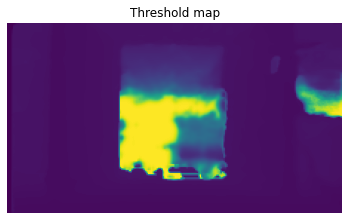

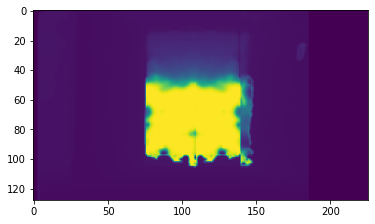

In [161]:
env_loader.reset_images()
env_loader.depth_mask(0.71)
env_loader.depthmask.threshold[:, -40:] = 0
env_loader.depthmask.threshold[:, 110:140] = env_loader.depthmask.threshold[:, ::-1][:, 120:150]
import matplotlib.pyplot as plt
plt.imshow(env_loader.depthmask.threshold)
plt.show()

In [103]:
bags: dict = {}
paths = os.walk("../dataset/Door_EXP/A208/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'bag' in file_name:
            bags[file_name] = md.BagLoader(os.path.join(path, file_name))
            bags[file_name].export_images(show=False)
                
print(bags.keys())

20240709_151047.bag retrieving bag infomation... duration = 153.847969 seconds


  0%|          |[00:00<?]

Done exporting 6328 frames
20240709_153519.bag retrieving bag infomation... duration = 98.743792 seconds


  0%|          |[00:00<?]

Done exporting 4056 frames
20240709_151439.bag retrieving bag infomation... duration = 243.314012 seconds


  0%|          |[00:00<?]

Done exporting 9620 frames
20240709_153810.bag retrieving bag infomation... duration = 54.739046 seconds


  0%|          |[00:00<?]

Done exporting 2611 frames
20240709_155837.bag retrieving bag infomation... duration = 206.547764 seconds


  0%|          |[00:00<?]

Done exporting 8245 frames
20240709_162037.bag retrieving bag infomation... duration = 41.495598 seconds


  0%|          |[00:00<?]

Done exporting 2103 frames
20240709_185105.bag retrieving bag infomation... duration = 160.822366 seconds


  0%|          |[00:00<?]

Done exporting 6480 frames
20240709_192338.bag retrieving bag infomation... duration = 88.403132 seconds


  0%|          |[00:00<?]

Done exporting 3825 frames
20240709_192745.bag retrieving bag infomation... duration = 197.574797 seconds


  0%|          |[00:00<?]

Done exporting 7786 frames
20240709_193501.bag retrieving bag infomation... duration = 75.087958 seconds


  0%|          |[00:00<?]

Done exporting 3266 frames
20240709_192201.bag retrieving bag infomation... duration = 57.640777 seconds


  0%|          |[00:00<?]

Done exporting 2506 frames
20240709_170329.bag retrieving bag infomation... duration = 151.207912 seconds


  0%|          |[00:00<?]

Done exporting 6113 frames
20240709_164816.bag retrieving bag infomation... duration = 238.636934 seconds


  0%|          |[00:00<?]

Done exporting 9435 frames
20240709_190344.bag retrieving bag infomation... duration = 48.168188 seconds


  0%|          |[00:00<?]

Done exporting 2211 frames
20240709_142959-env.bag retrieving bag infomation... duration = 10.380634 seconds


  0%|          |[00:00<?]

Done exporting 455 frames
20240709_163401.bag retrieving bag infomation... duration = 164.884034 seconds


  0%|          |[00:00<?]

Done exporting 6597 frames
20240709_185522.bag retrieving bag infomation... duration = 30.087591 seconds


  0%|          |[00:00<?]

Done exporting 1524 frames
20240709_192538.bag retrieving bag infomation... duration = 93.906727 seconds


  0%|          |[00:00<?]

Done exporting 3804 frames
20240709_161523.bag retrieving bag infomation... duration = 123.561948 seconds


  0%|          |[00:00<?]

Done exporting 5209 frames
20240709_191754.bag retrieving bag infomation... duration = 131.929694 seconds


  0%|          |[00:00<?]

Done exporting 5394 frames
20240709_152129.bag retrieving bag infomation... duration = 232.105626 seconds


  0%|          |[00:00<?]

Done exporting 9119 frames
20240709_163045.bag retrieving bag infomation... duration = 159.95438 seconds


  0%|          |[00:00<?]

Done exporting 6453 frames
20240709_193258.bag retrieving bag infomation... duration = 97.344332 seconds


  0%|          |[00:00<?]

Done exporting 4024 frames
20240709_160253.bag retrieving bag infomation... duration = 185.87297 seconds


  0%|          |[00:00<?]

Done exporting 7324 frames
20240709_193133.bag retrieving bag infomation... duration = 61.518465 seconds


  0%|          |[00:00<?]

Done exporting 2755 frames
20240709_161802.bag retrieving bag infomation... duration = 82.898913 seconds


  0%|          |[00:00<?]

Done exporting 3441 frames
20240709_153959.bag retrieving bag infomation... duration = 232.864265 seconds


  0%|          |[00:00<?]

Done exporting 9084 frames
20240709_184929.bag retrieving bag infomation... duration = 62.513833 seconds


  0%|          |[00:00<?]

Done exporting 2697 frames
20240709_164411.bag retrieving bag infomation... duration = 178.366826 seconds


  0%|          |[00:00<?]

Done exporting 7192 frames
20240709_193644.bag retrieving bag infomation... duration = 68.42257 seconds


  0%|          |[00:00<?]

Done exporting 3086 frames
20240709_165643.bag retrieving bag infomation... duration = 207.956044 seconds


  0%|          |[00:00<?]

Done exporting 8326 frames
20240709_190508.bag retrieving bag infomation... duration = 157.17741 seconds


  0%|          |[00:00<?]

Done exporting 6332 frames
20240709_160646.bag retrieving bag infomation... duration = 104.207385 seconds


  0%|          |[00:00<?]

Done exporting 4373 frames
20240709_162151.bag retrieving bag infomation... duration = 128.865711 seconds


  0%|          |[00:00<?]

Done exporting 5199 frames
20240709_183850.bag retrieving bag infomation... duration = 169.153982 seconds


  0%|          |[00:00<?]

Done exporting 6748 frames
20240709_192105.bag retrieving bag infomation... duration = 27.41819 seconds


  0%|          |[00:00<?]

Done exporting 1400 frames
20240709_184243.bag retrieving bag infomation... duration = 253.647322 seconds


  0%|          |[00:00<?]

Done exporting 9910 frames
20240709_154427.bag retrieving bag infomation... duration = 225.200707 seconds


  0%|          |[00:00<?]

Done exporting 8851 frames
20240709_185753.bag retrieving bag infomation... duration = 125.164244 seconds


  0%|          |[00:00<?]

Done exporting 5099 frames
20240709_170041.bag retrieving bag infomation... duration = 145.109531 seconds


  0%|          |[00:00<?]

Done exporting 5771 frames
20240709_155258.bag retrieving bag infomation... duration = 164.291317 seconds


  0%|          |[00:00<?]

Done exporting 6554 frames
20240709_160857.bag retrieving bag infomation... duration = 266.996663 seconds


  0%|          |[00:00<?]

Done exporting 10290 frames
20240709_154950.bag retrieving bag infomation... duration = 159.114158 seconds


  0%|          |[00:00<?]

Done exporting 6301 frames
dict_keys(['20240709_151047.bag', '20240709_153519.bag', '20240709_151439.bag', '20240709_153810.bag', '20240709_155837.bag', '20240709_162037.bag', '20240709_185105.bag', '20240709_192338.bag', '20240709_192745.bag', '20240709_193501.bag', '20240709_192201.bag', '20240709_170329.bag', '20240709_164816.bag', '20240709_190344.bag', '20240709_142959-env.bag', '20240709_163401.bag', '20240709_185522.bag', '20240709_192538.bag', '20240709_161523.bag', '20240709_191754.bag', '20240709_152129.bag', '20240709_163045.bag', '20240709_193258.bag', '20240709_160253.bag', '20240709_193133.bag', '20240709_161802.bag', '20240709_153959.bag', '20240709_184929.bag', '20240709_164411.bag', '20240709_193644.bag', '20240709_165643.bag', '20240709_190508.bag', '20240709_160646.bag', '20240709_162151.bag', '20240709_183850.bag', '20240709_192105.bag', '20240709_184243.bag', '20240709_154427.bag', '20240709_185753.bag', '20240709_170041.bag', '20240709_155258.bag', '20240709_16085

In [350]:
cur = '20240709_154950'

def process(loader):
    loader.reset_images()
    loader.clear_excessive_depth(3600)
    #loader.depth_mask(tmap=env_loader.depthmask.threshold)
    #loader.depth_mask(0.9)
    loader.depth_mask(tmap=tt)
    tmap = md.Raw(bags[f'{cur}.bag'].depthmask.threshold)
    return tmap

tmap = process(bags[f'{cur}.bag'])
browse_images(bags[f'{cur}.bag'].images)

Data reset!
Clearing depth > 3600...Done
Masking...Done


interactive(children=(IntSlider(value=3150, description='i', max=6301), Output()), _dom_classes=('widget-inter…

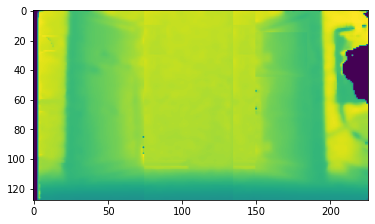

In [ ]:
tt = tmap.value
tt[tt==0] = tr[tt==0]
#tt[20:40,40:60] = tl[20:40,40:60]
tt[15:45, 150:185] = tt[75:105, 150:185]
tt[:, 75:150] = tr[:, 15:90]
plt.imshow(tt)
plt.show()

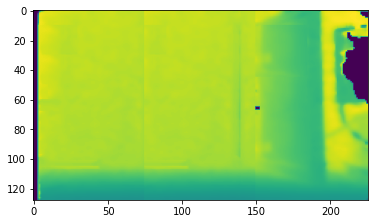

In [257]:
# Right door open
tr = tmap.value
tr[:, 110:150] = tr[:, ::-1][:, 120:160]
tr[10:30, 0:30] = tr[30:50, 0:30]
tr[50:60, 0:10] = tr[40:50, 0:10]
tr[:, 75:140] = tr[:, 15:80]
tr[10:45, 150:185] = tr[70:105, 150:185]
plt.imshow(tr)
plt.show()

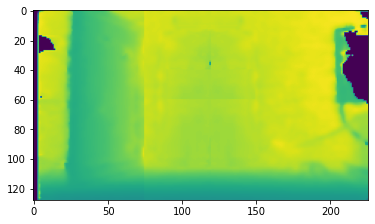

In [200]:
# Left door open
tl = tmap.value
tl[:, 75:120] = tl[:, ::-1][:, 65:110]
tl[40:60, 90:150] = tl[60:80, 90:150]
plt.imshow(tl)
plt.show()

In [351]:
bags[f'{cur}.bag'].normalize_depth(3600)
bags[f'{cur}.bag'].save_images()

Normalizing depth by 3600...Done
Saving...Done


#### For A308 - First Day

In [ ]:
env_path = '../dataset/Door_EXP/A308/20240716_153816-env.bag'
env_loader = md.BagLoader(env_path)

In [ ]:
env_loader.reset_images()
env_loader.depth_mask(0.71)
env_loader.depthmask.threshold[:, -40:] = 0
env_loader.depthmask.threshold[:, 110:140] = env_loader.depthmask.threshold[:, ::-1][:, 120:150]
import matplotlib.pyplot as plt
plt.imshow(env_loader.depthmask.threshold)
plt.show()

In [3]:
import os
import make_dataset_v07 as md
bags: dict = {}
paths = os.walk("../dataset/Door_EXP/A308/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'bag' in file_name and '0716' in file_name:
            bags[file_name] = os.path.join(path, file_name)
                
print(bags.keys())

dict_keys(['20240716_145943.bag', '20240716_150429.bag', '20240716_152801.bag', '20240716_154212.bag', '20240716_154608.bag', '20240716_155114.bag', '20240716_161921.bag', '20240716_161016.bag', '20240716_150946.bag', '20240716_152326.bag', '20240716_160748.bag', '20240716_153816-env.bag', '20240716_145635.bag', '20240716_152015.bag', '20240716_153206.bag', '20240716_161503.bag', '20240716_155647.bag'])


In [240]:
cur = '20240716_161503.bag'
loader = md.BagLoader(bags[cur])
loader.export_images(show=False)

20240716_161503.bag retrieving bag infomation... duration = 227.304346 seconds


  0%|          |[00:00<?]

Done exporting 8881 frames


In [241]:
def process(loader):
    # loader.reset_images()
    loader.clear_excessive_depth(3600)
    #loader.depth_mask(tmap=env_loader.depthmask.threshold)
    #loader.depth_mask(0.9)
    loader.depth_mask(tmap=tl)
    tmap = md.Raw(loader.depthmask.threshold)
    return tmap

tmap = process(loader)
browse_images(loader.images)

Clearing depth > 3600...Done
Masking...Done


interactive(children=(IntSlider(value=4440, description='i', max=8881), Output()), _dom_classes=('widget-inter…

In [242]:
loader.normalize_depth(3600)
loader.save_images()

Normalizing depth by 3600...Done
Saving...Done


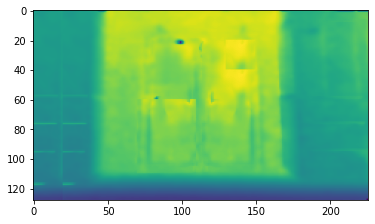

In [189]:
tb = tmap0.value
tb[:, :20] = tb[:, 20:40]
tb[60:110, 70:110] = tb[:, ::-1][60:110, 70:110]
tb[20:40, 130:150] = tb[40:60,130:150]
#tb[18:120, 70:145] = tl[18:120, 70:145]
#tb[20:50, 70:130] = tb[0:30, 100:160]
#tb[18:120, 145:155] = tl[18:120, 145:155]
plt.imshow(tb)
plt.show()

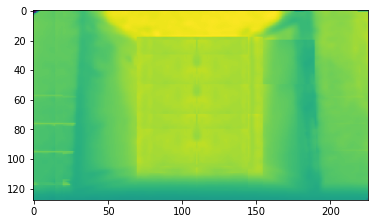

In [217]:
tt = tmap.value
tt[tt==0] = tr[tt==0]
tt[tt==0] = tl[tt==0]
tt[:, :20] = tl[:, :20]
tt[18:120, 70:145] = tr[18:120, 70:145]
tt[18:120, 145:155] = tl[18:120, 145:155]
tt[18:60, 70:155] = tt[68:110, 70:155]
tt[50:70, 70:155] = tt[80:100, 70:155]
tt[20:50, 155:190] = tt[50:80, 155:190]
tt[0:20, 155:190] = tr[0:20, 155:190]
plt.imshow(tt)
plt.show()

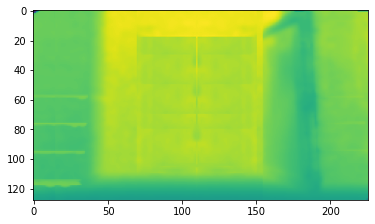

In [138]:
tr = tmap0.value
tr[:, 70:110] = tt[:, 70:110]
# tr[20:25, 95:105] = tr[25:30, 95:105]
tr[:, :15] = tr[:, 10:25]
tr[:, 110:155] = tr[:, ::-1][:, 115:160]
plt.imshow(tr)

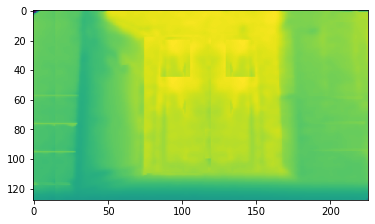

In [45]:
tl = tmap3.value
tl[20:45, 130:150] = tl[45:70, 130:150]
tl[80:100, 110:120] = tl[60:80, 110:120]
tl[18:110, 75:120] = tl[:, ::-1][18:110, 65:110]
tl[:, :15] = tl[:, 10:25]
plt.imshow(tl)
plt.show()

#### For A308 - Second Day

In [ ]:
bags2: dict = {}
paths = os.walk("../dataset/Door_EXP/A308/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'bag' in file_name and '0717' in file_name:
            bags2[file_name] = md.BagLoader(os.path.join(path, file_name))
            bags2[file_name].export_images(show=False)
                
print(bags2.keys())

#### For A308T

In [244]:
import os
import make_dataset_v07 as md
bags: dict = {}
paths = os.walk("../dataset/Door_EXP/A308T/")
for path, _, file_lst in paths:
    for file_name in file_lst:
        if 'bag' in file_name and '0731_155729' not in file_name:
            bags[file_name] = os.path.join(path, file_name)
                
print(bags.keys())

dict_keys(['20240731_134433.bag', '20240731_132913.bag', '20240731_153350.bag', '20240731_150445.bag', '20240731_152721.bag', '20240731_135314.bag', '20240731_141803.bag', '20240731_145305.bag', '20240731_153002.bag', '20240731_154828.bag', '20240731_134148.bag', '20240731_145901.bag', '20240731_130932-test.bag', '20240731_132526.bag', '20240731_142041.bag', '20240731_142508.bag', '20240731_134901.bag', '20240731_132041.bag', '20240731_153744.bag', '20240731_143016.bag', '20240731_154527.bag', '20240731_144845.bag', '20240731_131758.bag', '20240731_155303.bag'])


In [537]:
bags: dict = {}

for file in {'135314'}:
    bags[file] = md.BagLoader(f'../dataset/Door_EXP/A308T/20240731_{file}.bag')
    bags[file].export_images(show=False)

20240731_155729.bag retrieving bag infomation...

KeyError: 'duration'

In [534]:
cur = '155303'
def process(loader):
    #loader.reset_images()
    loader.clear_excessive_depth(3600)
    #loader.images = loader.images[1061:]
    
    #loader.depth_mask(tmap=env_loader.depthmask.threshold)
    #loader.depth_mask(0.9)
    loader.depth_mask(tmap=tl)
    tmap = md.Raw(loader.depthmask.threshold)
    return tmap

tmap_ = process(bags[cur])
#p1 = bags[cur].images
browse_images(bags[cur].images)

Clearing depth > 3600...Done
Masking...Done


interactive(children=(IntSlider(value=6130, description='i', max=12260), Output()), _dom_classes=('widget-inte…

In [535]:
bags[cur].normalize_depth(3600)
bags[cur].save_images()

Normalizing depth by 3600...Done
Saving...Done


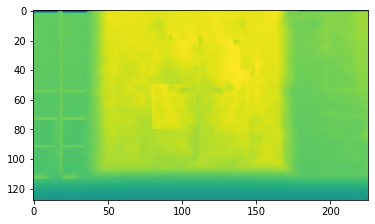

In [503]:
tb = tmap_.value
tb[:, :20] = tb[:, 20:40]
tb[50:80, 80:110] = tb[:,::-1][50:80, 80:110]
tb[20:40, 140:150] = tb[20:40, 155:165]
tb[10:20, 90:110] = tb[10:20, 110:130]
# tb[100:110, 70:150] = tr[100:110, 70:150]
plt.imshow(tb)
plt.show()

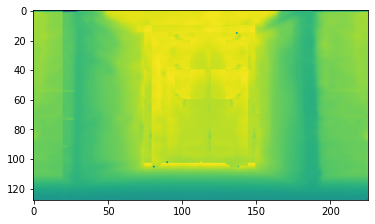

In [519]:
tt = tmap_.value
tt[tt==0] = tll[tt==0]
tt[:, :20] = tt[:,::-1][:, :20]
tt[10:15, 70:150] = tt[:5, 70:150]
tt[10:110, 75:80] = tt[10:110, 115:120]
tt[10:110, 145:150] = tt[10:110, 115:120]
tt[70:80, 150:155] = tt[50:60, 150:155]
plt.imshow(tt)
plt.show()

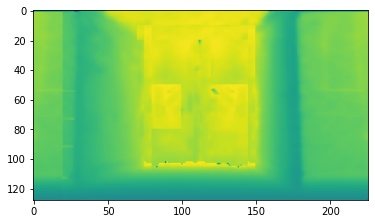

In [466]:
tt_ = tmap_.value
tt_[tt_==0] = tt[tt_==0]
tt_[:, :20] = tt_[:,::-1][:, :20]
tt_[10:20, 70:150] = tt_[:10, 70:150]
tt_[10:110, 75:80] = tt_[10:110, 115:120]
tt_[10:110, 145:150] = tt_[10:110, 115:120]
plt.imshow(tt_)
plt.show()

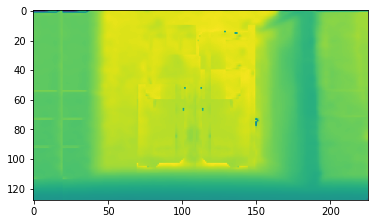

In [529]:
tr_ = tmap_.value
tr_[tr_==0] = tt[tr_==0]
tr_[:, :20] = tr_[:, 20:40]
tr_[50:110, 70:110] = tr_[:,::-1][50:110, 80:120]
tr_[10:30, 90:110] = tr_[10:30, 70:90]
tr_[10:110, 145:150] = tb[10:110, 145:150]
plt.imshow(tr_)
plt.show()

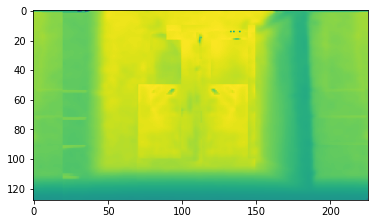

In [359]:
tr = tmap_.value
tr[tr==0] = tt[tr==0]
tr[:, :20] = tt[:, :20]
tr[50:110, 70:100] = tr[:,::-1][50:110, 80:110]
tr[10:20, 90:110] = tr[10:20, 120:140]
tr[10:100, 100:120] = tt[10:100, 100:120]
tr[10:110, 145:155] = tt[10:110, 145:155]
tr[100:115, 70:150] = tb[100:115, 70:150]
plt.imshow(tr)
plt.show()

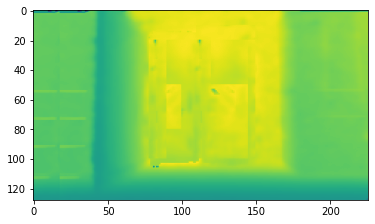

In [392]:
tl = tmap_.value
tl[tl==0] = tb[tl==0]
tl[:, :18] = tl[:, 20:38]
tl[10:100, 110:150] = tb[10:100, 110:150]
plt.imshow(tl)
plt.show()

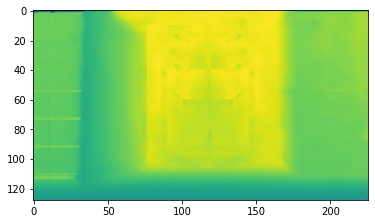

In [493]:
tll = tmap_.value
tll[:, :12] = tll[:, 12:24]
tll[20:40, 130:150] = tll[:20, 130:150]
tll[40:60, 120:140] = tll[20:40, 120:140]
tll[10:110, 77:120] = tll[:,::-1][10:110, 67:110]
plt.imshow(tll)
plt.show()

#### For B211 - First Day

In [114]:
import os
import make_dataset_v07 as md

bags: dict = {}
for file in {'165028'}:
#for file in {'135314'}:
    bags[file] = md.BagLoader(f'../dataset/Door_EXP/B211/20240723_{file}.bag')
    bags[file].export_images(show=False)

20240723_165028.bag retrieving bag infomation... duration = 365.568026 seconds


  0%|          |[00:00<?]

Done exporting 13550 frames


In [115]:
cur = '165028'
def process(loader):
    loader.reset_images()
    loader.clear_excessive_depth(3600)
    #loader.images = loader.images[1061:]
    
    #loader.depth_mask(tmap=env_loader.depthmask.threshold)
    #loader.depth_mask(0.9)
    loader.depth_mask(tmap=tb)
    tmap = md.Raw(loader.depthmask.threshold)
    return tmap

tmap_ = process(bags[cur])
#p1 = bags[cur].images
browse_images(bags[cur].images)

Data reset!
Clearing depth > 3600...Done
Masking...Done


interactive(children=(IntSlider(value=6775, description='i', max=13550), Output()), _dom_classes=('widget-inte…

In [116]:
bags[cur].normalize_depth(3600)
bags[cur].save_images()

Normalizing depth by 3600...Done
Saving...Done


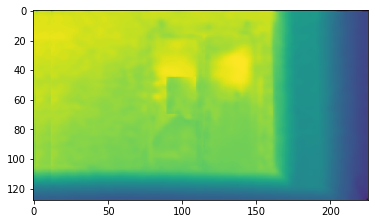

In [101]:
tb = tmap_.value
tb[:, :12] = tb[:, 10:22]
tb[45:70,90:110] = tb[45:70, 110:130]
plt.imshow(tb)
plt.show()

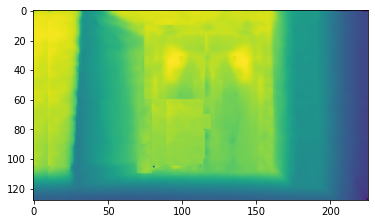

In [59]:
tl = tmap_.value
tl[:, :10] = tl[:, 10:20]
tl[60:80, 45:55] = tl[40:60, 45:55]
tl[tl==0] = tr[tl==0]
tl[10:60, 75: 120] = tl[:,::-1][10:60, 65: 110]
tl[90:110, 70:80] = tl[70:90, 70:80]
tl[70:80, 110:120] = tr[70:80, 110:120]
plt.imshow(tl)
plt.show()

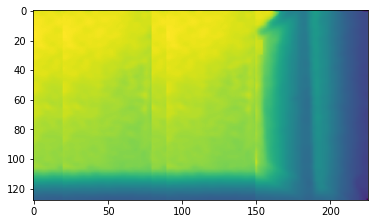

In [20]:
tr = tmap_.value
tr[:, :20] = tr[:, 20:40]
tr[:, 80:150] = tr[:, 10:80]
tr[20:30, 150:155] = tr[20:30, 140:145]
plt.imshow(tr)
plt.show()

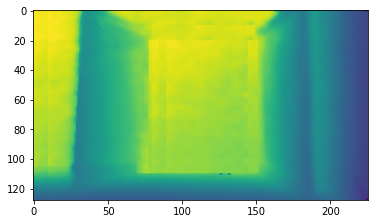

In [82]:
tt = tmap_.value
tt[:, :10] = tt[:, 10:20]
tt[:10, :20] = tt[10:20, :20]
tt[tt==0] = tr[tt==0]
tt[10:20, 80:150] = tt[:10, 80:150]
tt[20:110, 78:85] = tt[20:110, 88:95]
# tt[50:60, 100:110] = tt[:, ::-1][50:60, 100:110]
tt[100:110, 70:150] = tt[90:100, 70:150]
tt[20:110, 145:152] = tt[20:110, 120:127]
plt.imshow(tt)
plt.show()

#### For B211 - Second Day

#### For C605

In [ ]:
import os
import make_dataset_v07 as md

bags: dict = {}
l1 = ['182921', '183051', '183536']
l2 = ['184042', '184335', '184530']
l3 = ['185039']
for file in ['184335', '184530', '185039']:
#for file in {'135314'}:
    bags[file] = md.BagLoader(f'../dataset/Door_EXP/C605/20240805_{file}.bag')
    bags[file].export_images(show=False)

20240805_184042.bag retrieving bag infomation... duration = 152.749778 seconds


  0%|          |[00:00<?]

Done exporting 9157 frames
20240805_184335.bag retrieving bag infomation... duration = 88.137628 seconds


  0%|          |[00:00<?]

Done exporting 5283 frames
20240805_184530.bag retrieving bag infomation... duration = 250.145853 seconds


  0%|          |[00:00<?]

Done exporting 14995 frames


KeyboardInterrupt: 

In [ ]:
cur = '184335'
def process(loader):
    #loader.reset_images()
    loader.clear_excessive_depth(3600)
    #loader.images = loader.images[1794:]
    #loader.depth_mask(tmap=env_loader.depthmask.threshold)
    #loader.depth_mask(0.9)
    loader.depth_mask(tmap=tr)
    tmap = md.Raw(loader.depthmask.threshold)
    return tmap

tmap_ = process(bags[cur])
#p1 = bags[cur].images
bags[cur].images[:,:, :20] = 0
browse_images(bags[cur].images)

In [152]:
a = 10 * 10

In [ ]:
bags[cur].normalize_depth(3600)
bags[cur].save_images()

Normalizing depth by 3600...Done
Saving...

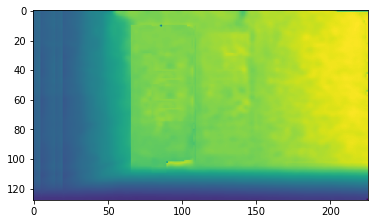

In [99]:
tl_ = tmap_.value
tl_[:,:15] = tl_[:,15:30]
tl_[10:110, 66:110] = tb[10:110, 66:110]
tl_[tl_==0] = tb[tl_==0]
plt.imshow(tl_)
plt.show()

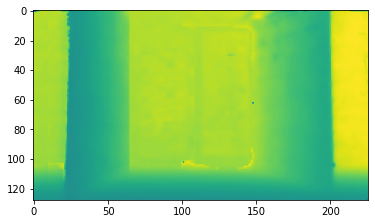

In [76]:
tt_ = tmap_.value
tt_[tt_==0] = tb[tt_==0]
tt_[:, :10] = tb[:,:10]
tt_[:, 65:100] = tr[:, 65:100]
plt.imshow(tt_)
plt.show()

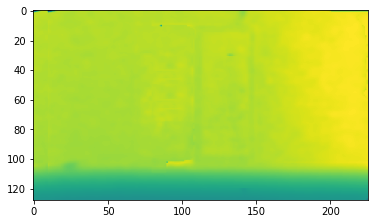

In [58]:
tb = tmap_.value
tb[:, :10] = tr[:, :10]
tb[:120, 80:] = tl[:120, 80:]
plt.imshow(tb)
plt.show()

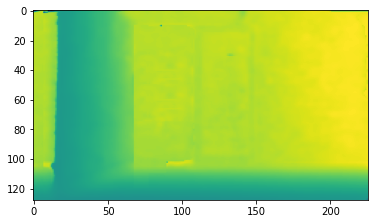

In [36]:
tl = tmap_.value
tl[tl==0] = tr[tl==0]
tl[:, :7] = tr[:, :7]
tl[10:120, 68:78] = tr[10:120, 70:80]
tl[100:110, 78:90] = tr[100:110, 78:90]
plt.imshow(tl)
plt.show()

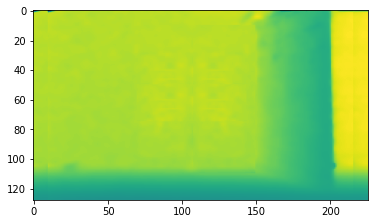

In [18]:
tr = tmap_.value
tr[:, :10] = tr[:, 10:20]
tr[50:75, 70:110] = tr[30:55, 70:110]
tr[10:110, 108:150] = tr[:, ::-1][10:110, 120:162]
tr[:, -10:] = tr[:, -20:-10]
plt.imshow(tr)
plt.show()

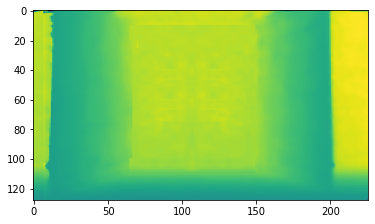

In [46]:
tt = tmap_.value
tt[tt==0] = tr[tt==0]
tt[:, :7] = tr[:, :7]
tt[10:110, 67:70] = tr[10:110, 67:70]
tt[10:20, 65:150] = tr[10:20, 65:150]
tt[10:110, 145:155] = tr[10:110, 145:155]
tt[100:110, 65:150] = tr[100:110, 65:150]
plt.imshow(tt)
plt.show()

### Image-related modalities

In [ ]:
import make_dataset_v07 as md
import os

for folder in ('A208', 'B211', 'A308', 'A308T', 'C605'):
    img_path = f"../dataset/Door_EXP/{folder}/"

    paths = os.walk(img_path)
    for path, _, file_lst in paths:
        for file_name in file_lst:
            file_name_, ext = os.path.splitext(file_name)
            if ext == '.npy' and 'rimg' in file_name_:
                if 'env' not in file_name:
                    imgloader = md.ImageLoader(os.path.join(path, file_name), os.path.join(path, file_name.replace('rimg', 'camtime')))
                    imgloader.crop()
                    imgloader.save()

### Labeling

In [1]:
import make_dataset_v07 as md
import os

for folder in ('A208', 'A308', 'B211', 'A308T', 'C605'):
    label_path = f"../dataset/Door_EXP/{folder}/"
    label_loader = md.LabelLoader(label_path)
    label_loader.load_label()
    label_loader.match()
    label_loader.save()

Loading label...Done
../dataset/Door_EXP/A208/ matching ...



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

Before dropping duplicate timestamps: 99565
After dropping duplicate timestamps: 49763
Environment matching done
Matched labels saved!
Loading label...Done
../dataset/Door_EXP/A308/ matching ...



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

Before dropping duplicate timestamps: 100216
After dropping duplicate timestamps: 50074
Environment matching done
Matched labels saved!
Loading label...Done
../dataset/Door_EXP/B211/ matching ...



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Before dropping duplicate timestamps: 132635
After dropping duplicate timestamps: 49780
Environment matching done
Matched labels saved!
Loading label...Done
../dataset/Door_EXP/A308T/ matching ...



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

Before dropping duplicate timestamps: 168261
After dropping duplicate timestamps: 41995
Environment matching done
Matched labels saved!
Loading label...Done
../dataset/Door_EXP/C605/ matching ...



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Before dropping duplicate timestamps: 91207
After dropping duplicate timestamps: 45591
Environment matching done
Matched labels saved!


In [ ]:
l = label_loader.segment_labels
l.drop_duplicates(subset='timestamp')
print(l)

In [ ]:
print(label_loader.csi_time['0717D05'][0])